In [1]:
# Importing necessary libraries and warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Increase the maximum number of displayed rows
pd.set_option("display.max_rows", 1000)

## Step 1: Reading the Data and performing Exploratory Data Analysis (EDA) ##


In [3]:
# Importing the CSV file
df = pd.read_csv('day.csv')

In [4]:
# Displaying the first few rows of the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking the number of rows and columns
df.shape

(730, 16)

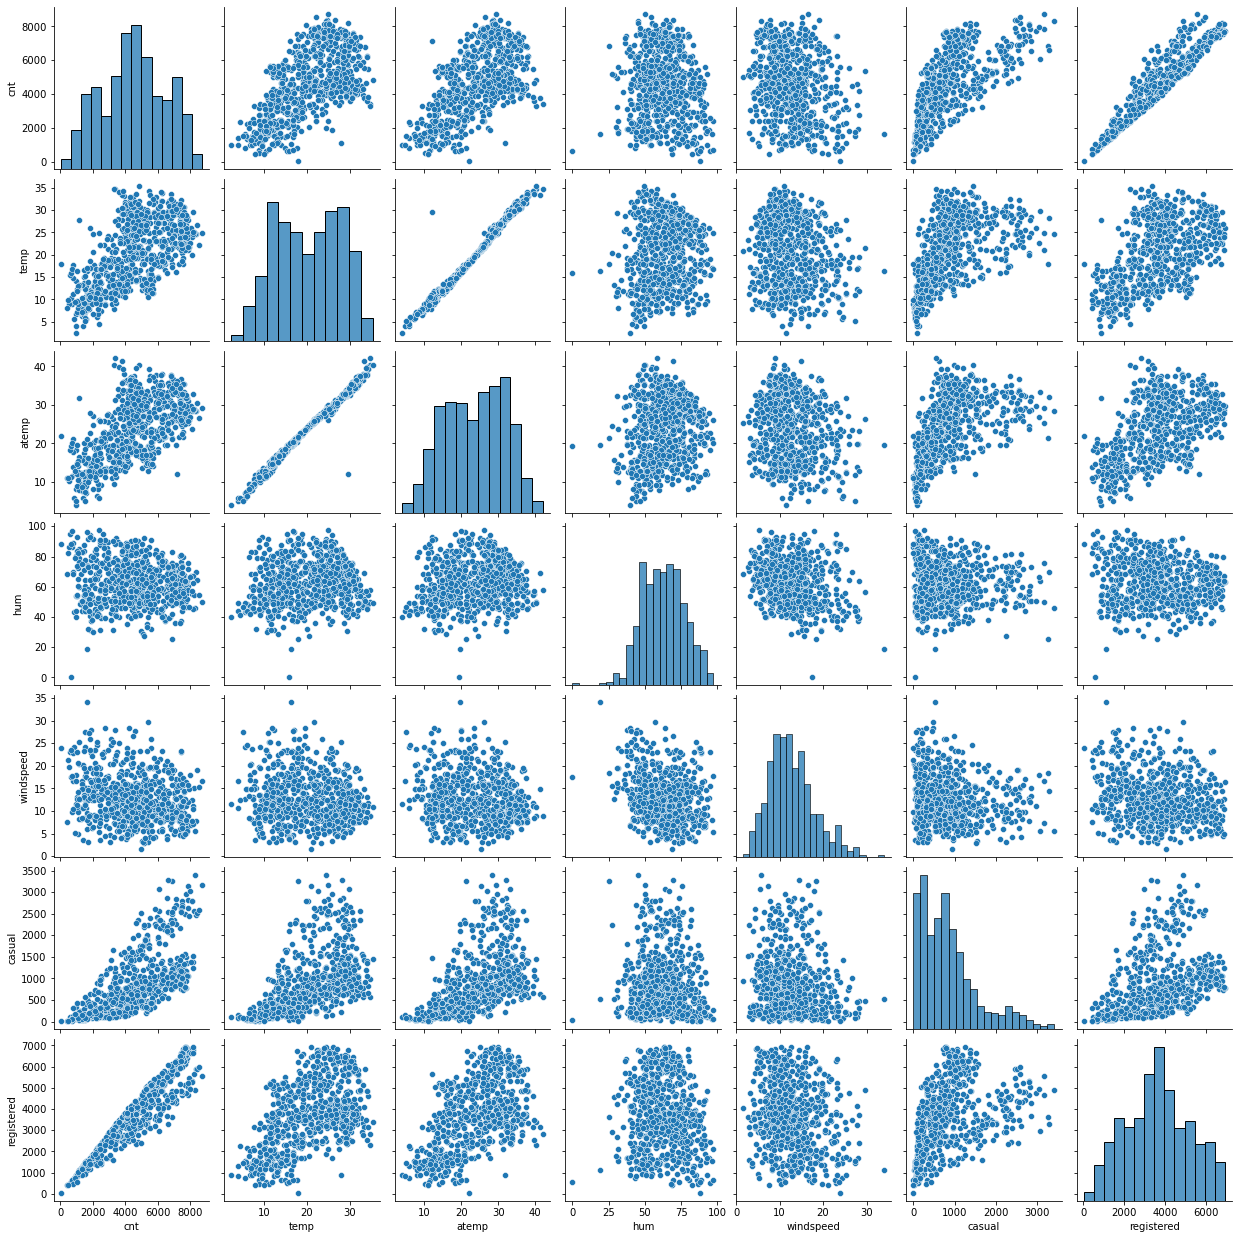

In [7]:
# Pair plot for numerical variables
numerical_vars = ["cnt", "temp", "atemp", "hum", "windspeed", "casual", "registered"]
sns.pairplot(df[numerical_vars])
plt.show()

# Inferences from pair plot of numerical variables:
1. The "cnt" column shows an upward moving trend when compared to "temp", "atemp",    indicating a potential linear relationship that can be used for prediction.
2. Similarly, when comparing "temp", "atemp", "casual", and "registered" with each other, some columns exhibit an upward moving trend, suggesting the possibility of using linear regression to predict actual values.

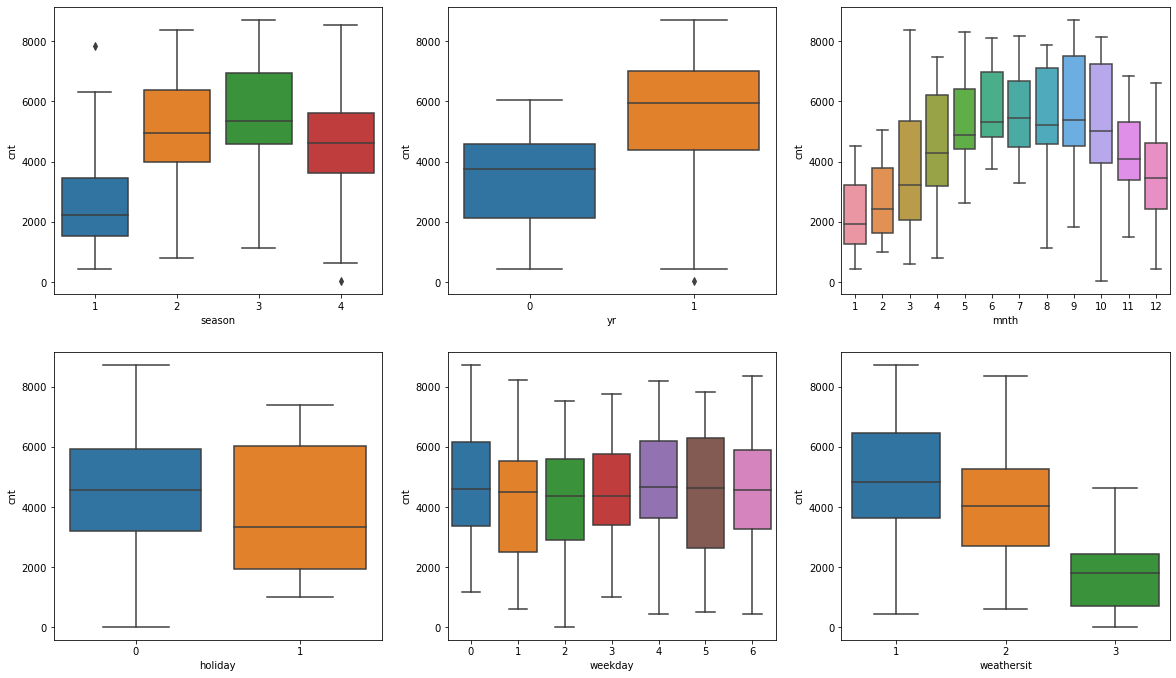

In [8]:
# Box plots for categorical variables
plt.figure(figsize=(20, 18))
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(3, 3, 2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(3, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(3, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

 # Inferences from categorical variables using box plots:
 
 1.The "cnt" variable is considered as the target variable, and box plots are plotted for categorical variables accordingly.
 
 2.In the fall season, the maximum number of bikes are registered, followed by winter, summer, and spring.
 
3.When comparing the months, registered users increase from January to September, but after that, the registration decreases slowly,which needs to be investigated.

4.On non-holiday days, the count of registrations is higher compared to holidays.

5.The maximum number of users register on Monday, followed by Sunday, and the least number of registrations occur on Wednesday.

6.The highest number of registered users is observed when the weather is clear, while the lowest number is observed during rainy/snowy weather.

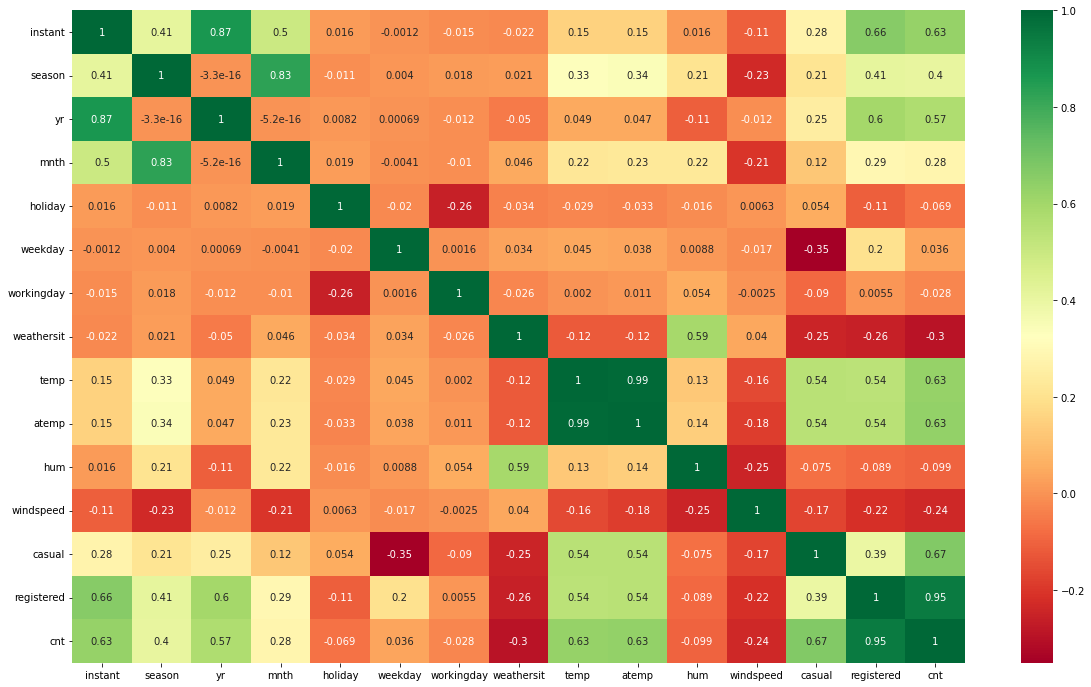

In [9]:
# Checking correlations among the variables using a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

# The heatmap reveals the following:


 Regarding the target variable "cnt", the following columns show positive correlations:
### 1. registered
### 2. casual
### 3. temp and atemp
### 4. yr
### 5. instant

## Step 2: Pre-processing the Data ##

In [10]:
# Dropping the unnecessary columns
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])


In [11]:
# Checking if the columns are dropped or not
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Now we will convert all non binary categorical columns to their original values one by one 
#so that we can create dummy variables.
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
#Mapping the numerical values of the 'season' column to their original labels
df.season = df.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})


In [14]:
# Checking the value counts after mapping
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# Creating dummy variables for the 'season' column
season = pd.get_dummies(df.season, drop_first=True)

In [16]:
# Checking the dummy variable
season.describe()


,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [17]:
# Concatenating the dummy variable with the dataset
df = pd.concat([df, season], axis=1)

In [18]:
# Dropping the 'season' column as it is no longer needed
df = df.drop(columns=['season'])

In [19]:
# Checking if the column has been dropped or not
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [20]:
# Mapping the numerical values of the 'mnth' column to their original labels
df.mnth = df.mnth.map({
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
    7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
})

In [21]:
# Checking the value counts after mapping
df.mnth.value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [22]:
# Creating dummy variables for the 'mnth' column
mnth = pd.get_dummies(df.mnth, drop_first=True)

In [23]:
# Checking the dummy variable
mnth.describe()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Concatenating the dummy variable with the dataset
df = pd.concat([df, mnth], axis=1)

In [25]:
# Checking if the column has been dropped or not
df.head()


,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [26]:
# As we don't require the mnth column any more so we will drop the same.
df=df.drop(columns=['mnth'])

In [27]:
# Mapping the numerical values of the 'weekday' column to their original labels
df.weekday = df.weekday.map({
    0: 'mon', 1: 'tues', 2: 'wed', 3: 'thurs',
    4: 'fri', 5: 'sat', 6: 'sun'
})

In [28]:
# Checking the value counts after mapping
df.weekday.value_counts()

tues     105
wed      105
thurs    104
fri      104
sat      104
sun      104
mon      104
Name: weekday, dtype: int64

In [29]:
# Creating dummy variables for the 'weekday' column
weekday=pd.get_dummies(df.weekday, drop_first=True)

In [30]:
# Checking the dummy variable
weekday.describe()

,mon,sat,sun,thurs,tues,wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.142466,0.142466,0.142466,0.142466,0.143836,0.143836
std,0.349767,0.349767,0.349767,0.349767,0.351164,0.351164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# Checking the dummy variable
weekday.describe()

,mon,sat,sun,thurs,tues,wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.142466,0.142466,0.142466,0.142466,0.143836,0.143836
std,0.349767,0.349767,0.349767,0.349767,0.351164,0.351164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Dropping the 'weekday' column as it is no longer needed
df = df.drop(columns=['weekday'])

In [33]:
# Checking if the column has been dropped or not
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [34]:
# Mapping the numerical values of the 'weathersit' column to their original labels
df.weathersit = df.weathersit.map({
    1: 'clear', 2: 'misty', 3: 'cloudy'
})

In [35]:
df.weathersit.value_counts()

clear     463
misty     246
cloudy     21
Name: weathersit, dtype: int64

In [36]:
# Creating dummy variables for the 'weathersit' column
weathersit = pd.get_dummies(df.weathersit, drop_first=True)

In [37]:
# Checking the dummy variable
weathersit.describe()

,cloudy,misty
count,730.000000,730.000000
mean,0.028767,0.336986
std,0.167266,0.473004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [38]:
# Concatenating the dummy variable with the dataset
df = pd.concat([df, weathersit], axis=1)

In [39]:
# Dropping the 'weathersit' column as it is no longer needed
df = df.drop(columns=['weathersit'])

In [40]:
# Checking if the column has been dropped or not
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,jan,jul,jun,mar,may,nov,oct,sep,cloudy,misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
# Dropping the 'atemp' column as we have the 'temp' column that can be used instead
df = df.drop(columns=['atemp'])

In [42]:
# Checking the column information to confirm that all columns have non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  aug         730 non-null    uint8  
 11  dec         730 non-null    uint8  
 12  feb         730 non-null    uint8  
 13  jan         730 non-null    uint8  
 14  jul         730 non-null    uint8  
 15  jun         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  may         730 non-null    uint8  
 18  nov         730 non-null    uint8  
 19  oct         730 non-null    u

## Step 3: Splitting the Data into Train and Test ##

In [43]:
# Importing the required libraries for dividing the data into train and test sets
from sklearn.model_selection import train_test_split

In [44]:
# Splitting into train and test
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)


In [45]:
# Checking the shape of the train set to confirm the split
df_train.shape


(510, 23)

In [46]:
# Checking the shape of the test set to confirm the split
df_test.shape

(220, 23)

## Step 4: Rescaling the Data ##

In [47]:
# Importing the MinMaxScaler library
from sklearn.preprocessing import MinMaxScaler

In [48]:
# Instantiate a MinMaxScaler object
scaler = MinMaxScaler()

In [49]:
# Creating a list of numerical variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [50]:
# Fit the scaler on the training data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [51]:
# Checking the rescaled numerical variables
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


## Step 5: Training the Model ##

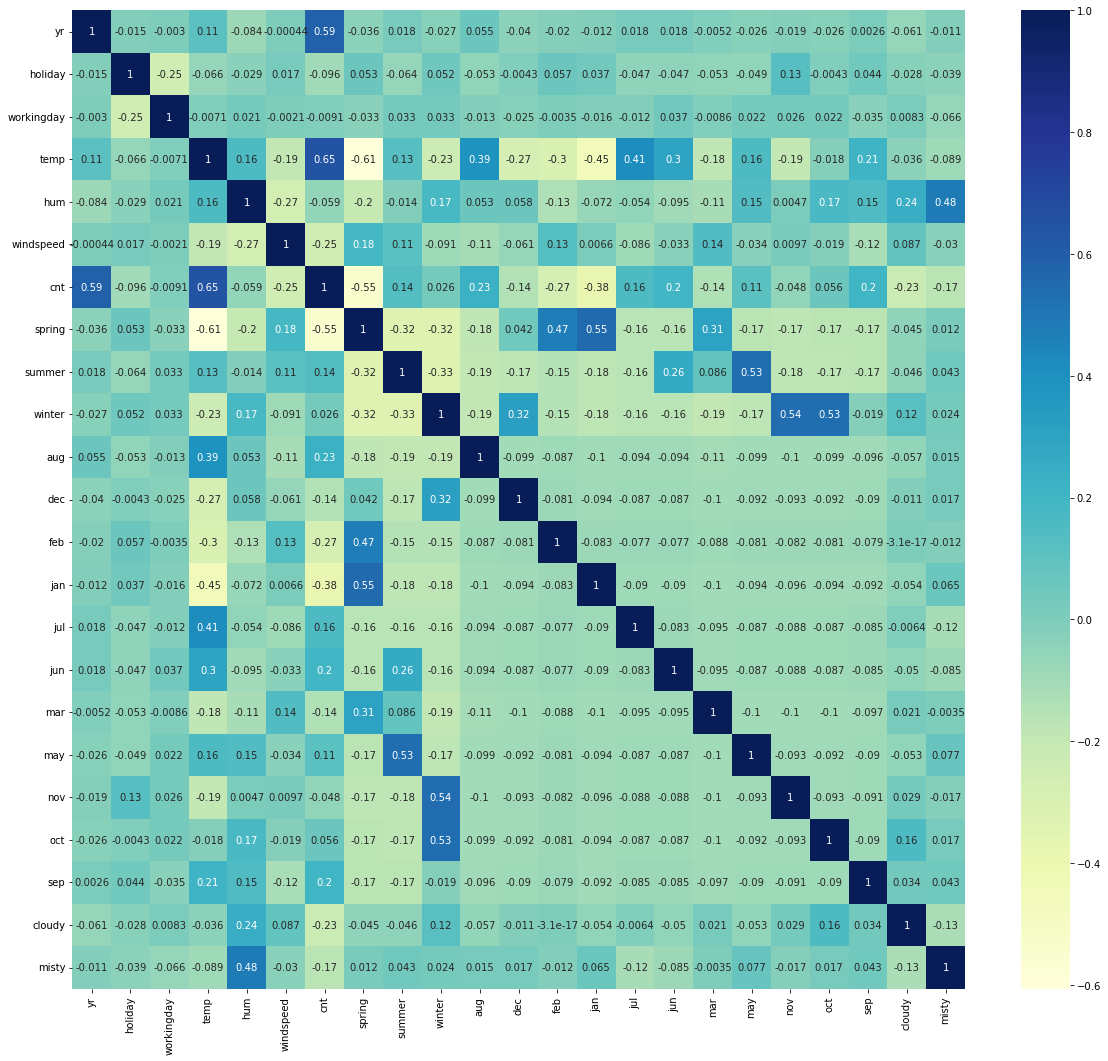

In [52]:
# Heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

### In the above heatmap, 'temp' variable has the highest correlation among the others, with a value of 0.65,
### followed by the 'yr' variable with a correlation of 0.59.

In [53]:
# Dividing into X_train and y_train sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [54]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,...,jan,jul,jun,mar,may,nov,oct,sep,cloudy,misty
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# Using Recursive Feature Elimination (RFE) for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [56]:
# Creating an RFE object and setting the number of features to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [57]:
# Checking the ranking and support for the variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 5),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 6),
 ('mar', False, 8),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 7),
 ('sep', True, 1),
 ('cloudy', True, 1),
 ('misty', True, 1)]

In [58]:
# Assigning a variable to the supported columns
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'cloudy', 'misty'],
      dtype='object')

In [59]:
# Checking the unsupported columns
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jun', 'mar', 'may', 'oct'], dtype='object')

In [60]:
# Creating a new X_train with selected variables
X_train_rfe = X_train[rfe_col]

In [61]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [62]:
# Assigning a LR object which is used to fit the line.

lr = sm.OLS(y_train, X_train_rfe).fit()

In [63]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 18 May 2023   Prob (F-statistic):          8.15e-189
Time:                        16:40:39   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
jul           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep            0.0755      0.017      4.466      0.000       0.042       0.109
cloudy        -0.2465      0.026     -9.331      0.000      -0.298      -0.195
misty         -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.77
4,hum,1.92
12,nov,1.77
10,jan,1.68
15,misty,1.57
9,dec,1.50


In [65]:
#Dropping spring variable as the preferrably VIF cannot be more than 5.00
X_train_rfe.drop(columns='spring', inplace=True)

In [66]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)

#Checking the constant variable
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,summer,winter,dec,jan,jul,nov,sep,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1


In [67]:
# Assigning a LR object which is used to fit the line.
lr1 = sm.OLS(y_train, X_train_rfe).fit()

In [68]:

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 18 May 2023   Prob (F-statistic):          8.15e-189
Time:                        16:40:39   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
jul           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep            0.0755      0.017      4.466      0.000       0.042       0.109
cloudy        -0.2465      0.026     -9.331      0.000      -0.298      -0.195
misty         -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# ReCalculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.76
3,temp,2.32
7,winter,2.09
4,hum,1.90
11,nov,1.71
9,jan,1.67
14,misty,1.55
8,dec,1.48
6,summer,1.44
10,jul,1.43


In [70]:
#Adding a constant varaible
X_train_rfe=sm.add_constant(X_train_rfe)


In [71]:
# Assigning a LR object which is used to fit the line.
lr3 = sm.OLS(y_train, X_train_rfe).fit()

In [72]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Thu, 18 May 2023   Prob (F-statistic):          3.50e-188
Time:                        16:40:40   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2562      0.029      8.899      0.000       0.200       0.313
yr             0.2290      0.008     28.159      0.000       0.213       0.245
holiday       -0.0946      0.026     -3.670      0.000      -0.145      -0.044
temp           0.5550      0.027     20.527      0.000       0.502       0.608
hum           -0.1742      0.038     -4.601      0.000      -0.249      -0.100
windspeed     -0.1971      0.026     -7.634      0.000      -0.248      -0.146
summer         0.0729      0.011      6.548      0.000       0.051       0.095
winter         0.1369      0.013     10.204      0.000       0.111       0.163
dec           -0.0295      0.018     -1.683      0.093      -0.064       0.005
jan           -0.0472      0.018     -2.590      0.010      -0.083      -0.011
jul           -0.0452      0.018     -2.509      0.012      -0.081      -0.010
nov           -0.0288      0.019     -1.548      0.122      -0.065       0.008
sep            0.0903      0.016      5.571      0.000       0.058       0.122
cloudy        -0.2402      0.027     -9.058      0.000      -0.292      -0.188
misty         -0.0514      0.010     -4.906      0.000      -0.072      -0.031
==============================================================================
Omnibus:                       58.341   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.396
Skew:                          -0.649   Prob(JB):                     4.36e-27
Kurtosis:                       5.007   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 6: Residual Analysis of the Train Data ##

In [75]:
# Making predictions using the model
y_train_pred = lr3.predict(X_train_rfe)

In [76]:
# Creating a dataframe with actual and predicted values
y_train_pred_final = pd.DataFrame({'Actual': y_train.values, 'Predicted': y_train_pred})

In [77]:
# Creating a new column for residuals
y_train_pred_final['Residuals'] = y_train_pred_final['Actual'] - y_train_pred_final['Predicted']

In [78]:
# Checking the dataframe with residuals
y_train_pred_final.head()

,Actual,Predicted,Residuals
576,0.827658,0.713819,0.113838
426,0.465255,0.517464,-0.052208
728,0.204096,0.374285,-0.170189
482,0.482973,0.601279,-0.118306
111,0.191095,0.263583,-0.072487


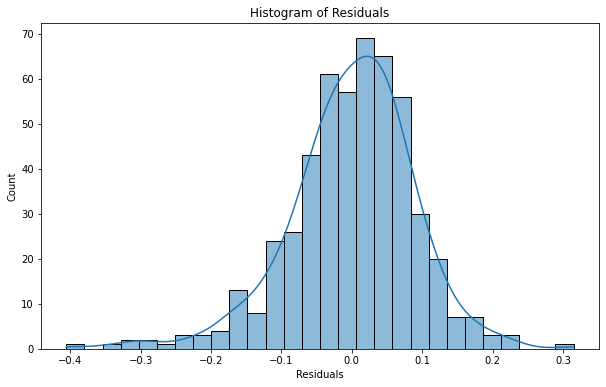

In [79]:
# Plotting the histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_train_pred_final['Residuals'], kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# The residuals seem to be normally distributed with a mean around zero, indicating a good fit of the model.


# Step 7: Making Predictions on the Test Set ##

In [80]:
# Scaling the test set using the scaler fitted on the training set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [81]:
# Dividing the test set into X_test and y_test sets
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
# Selecting the columns for the model that were selected during training
X_test_rfe = X_test[rfe_col]

In [83]:
# Adding a constant variable
X_test_rfe = sm.add_constant(X_test_rfe)

In [84]:
# Making predictions on the test set using the final model
y_test_pred = lr.predict(X_test_rfe)

## Step 8: Model Evaluation ##

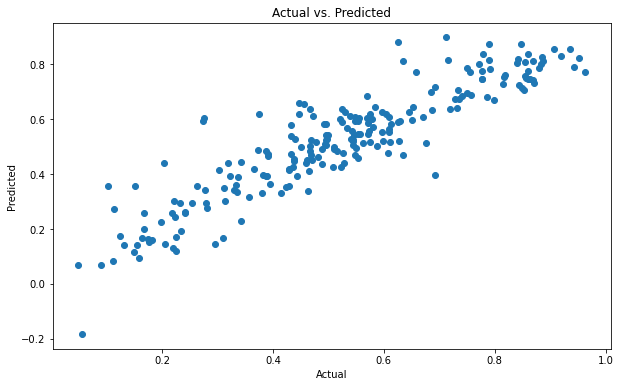

In [85]:
# Plotting the scatterplot of y_test and y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [86]:
# Calculating the R-squared value for the test set
from sklearn.metrics import r2_score


In [87]:
r2_score(y_test, y_test_pred)


0.8221708334023129

# The R-squared value for the test set is 0.822, indicating that the model explains 82.2% of the variance in the target variable.

In [89]:
# Calculating the Root Mean Squared Error (RMSE) for the test set
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09221048463315494

# As we can observe, the Mean Squared Error (MSE) for both the training and test datasets is close to 0, indicating that the model is accurately predicting the target variable. #